In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats
import math
from scipy import special
from numpy.polynomial.polynomial import polyfit
import pandas as pd
from pydataset import data
%matplotlib inline

Part 1 Intro to Matplotlip

Problem 1

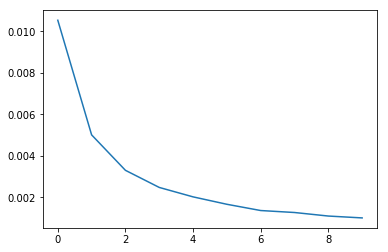

In [2]:
def drawRandomSamples(n):
    matrix = np.random.normal(size = (n,n))
    mean_value = np.mean(matrix, axis = 1)
    variance = np.var(mean_value)
    return variance

def plotRandomSamples():
    inputs = np.arange(100, 1100, 100)
    arr = []
    for i in range(len(inputs)):
        arr.append(drawRandomSamples(inputs[i]))

    plt.plot(arr)
    plt.show()
    
plotRandomSamples()

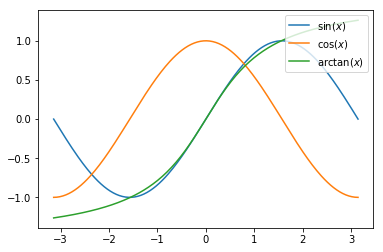

In [3]:
def drawTrigonometricFunctions():
    x = np.linspace(-np.pi, np.pi, 200)
    y1 = np.sin(x)
    y2 = np.cos(x)
    y3 = np.arctan(x)
    plt.plot(x, y1, label = r"$\sin(x)$")
    plt.plot(x, y2, label = r"$\cos(x)$")
    plt.plot(x, y3, label = r"$\arctan(x)$")
    plt.legend(loc = "upper right")
    plt.show()
    
drawTrigonometricFunctions()

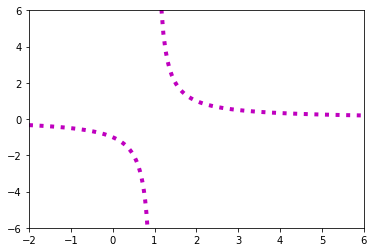

In [4]:
def drawDiscontinuousFunction():
    domain1 = np.linspace(-2, 1-1e-2, 100)
    domain2 = np.linspace(1+1e-2, 6, 100)
    image1 = 1 / (domain1 -1)
    image2 = 1 / (domain2 -1)
    plt.plot(domain1, image1, "m:", linewidth = 4)
    plt.plot(domain2, image2, "m:", linewidth = 4)
    plt.xlim(-2, 6)
    plt.ylim(-6, 6)
    plt.show()
    
drawDiscontinuousFunction()

Problem 4

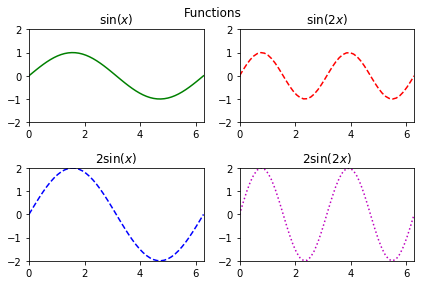

In [5]:
def drawFourFunctions():
    x = np.linspace(0, 2*np.pi, 50)
    y1 = np.sin(x)
    y2 = np.sin(2*x)
    y3 = 2* np.sin(x)
    y4 = 2* np.sin(2*x)
    y = np.vstack((y1, y2, y3, y4))

    plt.subplot(2,2,1)
    plt.title(r"$\sin(x)$")
    plt.axis([0, 2*np.pi, -2, +2])
    plt.plot(x, y[0, :], "g")

    plt.subplot(2,2,2)
    plt.title(r"$\sin(2x)$")
    plt.axis([0, 2*np.pi, -2, +2])
    plt.plot(x, y[1, :], "r--")

    plt.subplot(2,2,3)
    plt.title(r"$2\sin(x)$")
    plt.axis([0, 2*np.pi, -2, +2])
    plt.plot(x, y[2, :], "b--")

    plt.subplot(2,2,4)
    plt.title(r"$2\sin(2x)$")
    plt.axis([0, 2*np.pi, -2, +2])
    plt.plot(x, y[3, :], "m:")

    plt.suptitle("Functions")
    plt.tight_layout()
    plt.show()
    
drawFourFunctions()

Problem 5

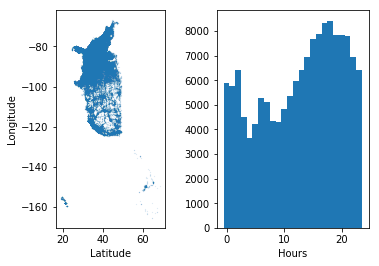

In [6]:
def visualizeFars():
    fars = np.load("FARS.npy")
    hours_arr = fars[:, 0]
    longitude_arr = fars[:, 1]
    latitude_arr = fars[:, 2]
    #print((fars[:,0]))

    fig, ax = plt.subplots(1,2)
    ax[0].plot(latitude_arr, longitude_arr, "o", markersize = 0.05)
    ax[0].set_xlabel("Latitude")
    ax[0].set_ylabel("Longitude")
    ax[0].set_aspect("equal")

    ax[1].hist(hours_arr, bins = np.arange(-0.5, 24.5))
    ax[1].set_xlabel("Hours")
    plt.show()

visualizeFars()

Problem 6

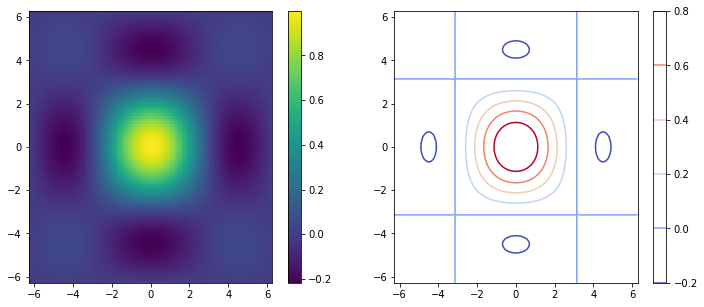

In [7]:
def threeDplot():
    x_array = np.linspace(-2*np.pi, 2*np.pi, 100)
    y_array = np.linspace(-2*np.pi, 2*np.pi, 100)
    X, Y = np.meshgrid(x_array, y_array)
    Z = np.sin(X)*np.sin(Y)/(X*Y)

    plt.figure(figsize = [12, 5])
    plt.subplot(1,2,1)
    plt.pcolormesh(X, Y, Z, cmap = "viridis")
    plt.axis([-2*np.pi, 2*np.pi, -2*np.pi, 2*np.pi])
    plt.colorbar()


    plt.subplot(1,2,2)
    plt.contour(X, Y, Z, cmap = 'coolwarm')
    plt.axis([-2*np.pi, 2*np.pi, -2*np.pi, 2*np.pi])
    plt.colorbar()

    plt.show()
    
threeDplot()


Part 2 Data Visualization

Problem 1

Section 1.  x mean:  9.0  y mean:  7.5  x var:  10.0  y var:  3.75  slop:  0.5  intercept:  3.0  correlation:  0.82
Section 2.  x mean:  9.0  y mean:  7.5  x var:  10.0  y var:  3.75  slop:  0.5  intercept:  3.0  correlation:  0.82
Section 3.  x mean:  9.0  y mean:  7.5  x var:  10.0  y var:  3.75  slop:  0.5  intercept:  3.0  correlation:  0.82
Section 4.  x mean:  9.0  y mean:  7.5  x var:  10.0  y var:  3.75  slop:  0.5  intercept:  3.0  correlation:  0.82
Although the scatter plots show that they are different, they have similar statistical data.


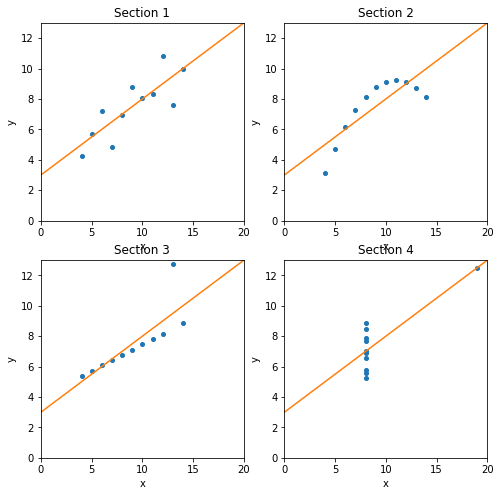

In [8]:
def visualizeAnscombe():
    temp = np.load("anscombe.npy")
    section1 = temp[:, 0:2]
    section2 = temp[:, 2:4]
    section3 = temp[:, 4:6]
    section4 = temp[:, 6:8]


    plt.figure(figsize = [8,8])

    #section1
    plt.subplot(2,2,1)
    plt.plot(section1[:,0], section1[:,1], "o", markersize = 4)
    plt.xlim(0, 20)
    plt.ylim(0, 13)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Section 1")

    temp1 = stats.linregress(section1[:,0], section1[:,1])
    slope1, intercept1, coeff1 = temp1[0], temp1[1], temp1[2]
    regress_x1 = np.linspace(0, 20, 20)
    regress_y1 = slope1 * regress_x1 + intercept1
    plt.plot(regress_x1, regress_y1)



    #section2
    plt.subplot(2,2,2)
    plt.plot(section2[:,0], section2[:,1], "o", markersize = 4)
    plt.xlim(0, 20)
    plt.ylim(0, 13)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Section 2")

    temp2 = stats.linregress(section2[:,0], section2[:,1])
    slope2, intercept2, coeff2 = temp2[0], temp2[1], temp2[2]
    regress_x2 = np.linspace(0, 20, 20)
    regress_y2 = slope2 * regress_x2 + intercept2
    plt.plot(regress_x2, regress_y2)



    #section3
    plt.subplot(2,2,3)
    plt.plot(section3[:,0], section3[:,1], "o", markersize = 4)
    plt.xlim(0, 20)
    plt.ylim(0, 13)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Section 3")

    temp3 = stats.linregress(section3[:,0], section3[:,1])
    slope3, intercept3, coeff3 = temp3[0], temp3[1], temp3[2]
    regress_x3 = np.linspace(0, 20, 20)
    regress_y3 = slope3 * regress_x3 + intercept3
    plt.plot(regress_x3, regress_y3)



    #section 4
    plt.subplot(2,2,4)
    plt.plot(section4[:,0], section4[:,1], "o", markersize = 4)
    plt.xlim(0, 20)
    plt.ylim(0, 13)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Section 4")

    temp4 = stats.linregress(section4[:,0], section4[:,1])
    slope4, intercept4, coeff4 = temp4[0], temp4[1], temp4[2]
    regress_x4 = np.linspace(0, 20, 20)
    regress_y4 = slope4 * regress_x4 + intercept4
    plt.plot(regress_x4, regress_y4)




    print("Section 1. ", "x mean: ", np.round(section1[:,0].mean(),2), " y mean: ", np.round(section1[:,1].mean(),2),
          " x var: ", np.round(np.var(section1[:, 0]),2), " y var: ", np.round(np.var(section1[:, 1]), 2),
          " slop: ", np.round(slope1, 2), " intercept: ", np.round(intercept1, 2), " correlation: ", np.round(coeff1, 2))
    print("Section 2. ", "x mean: ", np.round(section2[:,0].mean(),2), " y mean: ", np.round(section2[:,1].mean(),2),
          " x var: ", np.round(np.var(section2[:, 0]),2), " y var: ", np.round(np.var(section2[:, 1]), 2),
          " slop: ", np.round(slope2, 2), " intercept: ", np.round(intercept2, 2), " correlation: ", np.round(coeff2, 2))
    print("Section 3. ", "x mean: ", np.round(section3[:,0].mean(),2), " y mean: ", np.round(section3[:,1].mean(),2),
          " x var: ", np.round(np.var(section3[:, 0]),2), " y var: ", np.round(np.var(section3[:, 1]), 2),
          " slop: ", np.round(slope3, 2), " intercept: ", np.round(intercept3, 2), " correlation: ", np.round(coeff3, 2))
    print("Section 4. ", "x mean: ", np.round(section4[:,0].mean(),2), " y mean: ", np.round(section4[:,1].mean(),2),
          " x var: ", np.round(np.var(section4[:, 0]),2), " y var: ", np.round(np.var(section4[:, 1]), 2),
          " slop: ", np.round(slope4, 2), " intercept: ", np.round(intercept4, 2), " correlation: ", np.round(coeff4, 2))

    print("Although the scatter plots show that they are different, they have similar statistical data.")
    plt.show()
    
visualizeAnscombe()


Problem 2

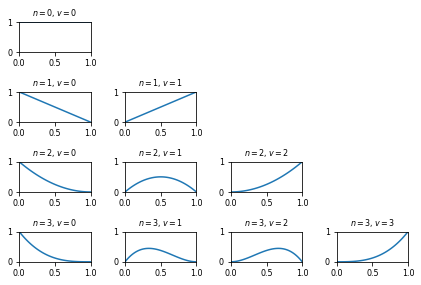

In [9]:
def BernsteinPolynomials():
    SMALL_SIZE = 8
    MEDIUM_SIZE = 10
    BIGGER_SIZE = 12

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)
    #n_grid = np.array([0, 1, 2, 3])
    #v_grid = np.array([0, 1, 2, 3])
    #N, V = np.meshgrid(n_grid, v_grid)
    Coeff = np.zeros((4,4))
    for n in range(4):
        for v in range(n+1):
            Coeff[n,v] = special.binom(n, v)

    #plt.subplot(4, 4, 1)

    #corresponding subplot index is 4n+v+1
    x_grid = np.linspace(0,1,50)
    #print(x_grid)
    temp = np.zeros_like(x_grid)

    #For index convenience, the first row is ommited
    y_matrix = np.tile(temp, (17,1))
    #print(y_matrix)
    #print(np.zeros_like(x_grid))
    #y_grid = np.vstack(np.zeros_like((x_grid),np.zeros_like(x_grid),np.zeros_like(x_grid),np.zeros_like(x_grid)))
    #print(y_grid)

    for nn in range(4):
        for vv in range(nn+1):
            y_matrix[4*nn+vv+1, :] = Coeff[nn,vv] * x_grid**vv * (1-x_grid)**(nn-vv)
            plt.subplot(4,4, 4 * nn + vv + 1)
            plt.title(r"$n=$" + str(nn) + r"$, v=$" + str(vv))
            plt.plot(x_grid, y_matrix[4*nn+vv+1, :])
            plt.xlim(0, 1)
            plt.ylim(0, 1)


    plt.tight_layout()
    plt.show()

BernsteinPolynomials()

Problem 3

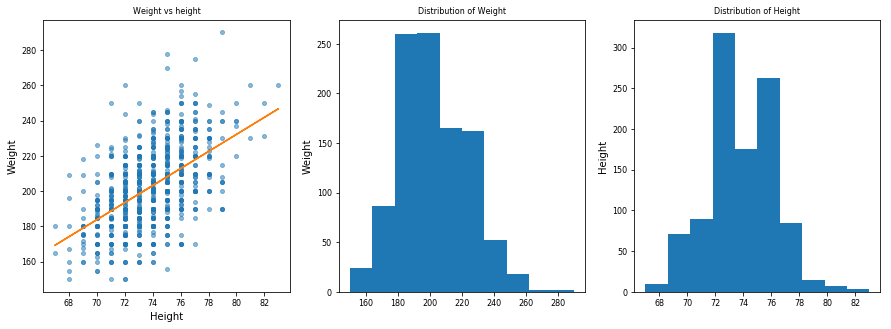

In [10]:
def heightWeightAge():
    data = np.load("MLB.npy")
    height = data[:,0]
    weight = data[:,1]
    age = data[:,2]
    #print(data)
    plt.figure(figsize = [15, 5])
    plt.subplot(1,3,1)
    plt.plot(height, weight, "o", markersize = 4, alpha = 0.5)
    plt.xlabel("Height")
    plt.ylabel("Weight")
    plt.title("Weight vs height")
    interc, slo = polyfit(height, weight, 1)
    plt.plot(height, interc + slo * height)

    plt.subplot(1,3,2)

    plt.hist(weight)
    plt.ylabel("Weight")
    plt.title("Distribution of Weight")

    plt.subplot(1,3,3)

    plt.hist(height)
    plt.ylabel("Height")
    plt.title("Distribution of Height")



    plt.show()

heightWeightAge()

Problem 4

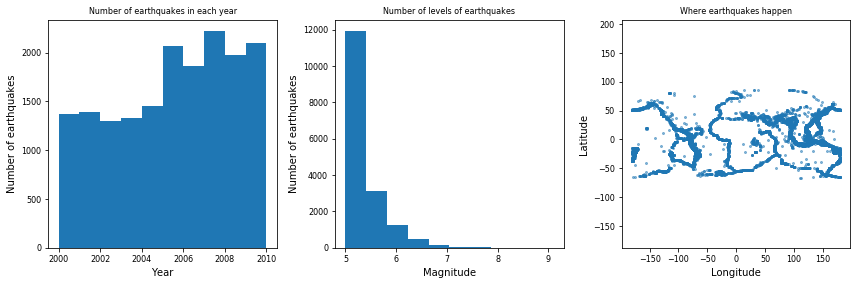

In [11]:
def visualizeEarthquakes():
    data = np.load("earthquakes.npy")
    date = data[:, 0]
    magnitude = data[:, 1]
    longitude = data[:, 2]
    latitude = data[:, 3]

    plt.figure(figsize = [12,4])
    plt.subplot(1,3,1)
    plt.hist(date, bins = np.arange(2000, 2011))
    plt.xlabel("Year")
    plt.ylabel("Number of earthquakes")
    plt.title("Number of earthquakes in each year")

    plt.subplot(1,3,2)
    plt.hist(magnitude)
    plt.xlabel("Magnitude")
    plt.ylabel("Number of earthquakes")
    plt.title("Number of levels of earthquakes")

    plt.subplot(1,3,3)
    plt.plot(longitude, latitude, "o", markersize = 2, alpha = 0.5)
    plt.axis("equal")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Where earthquakes happen")

    plt.tight_layout()
    plt.show()

visualizeEarthquakes()
    

Problem 5

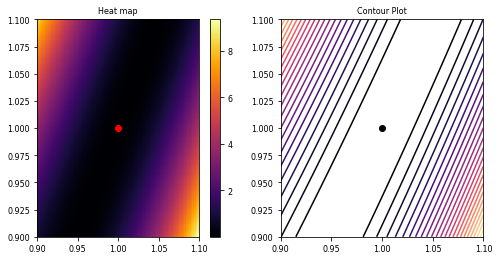

In [12]:
def Rosenbrock():
    x = np.linspace(0.9, 1.1, 100)
    y = np.linspace(0.9, 1.1, 100)
    X, Y = np.meshgrid(x, y)
    Z = (1-X)**2 + 100 * ((Y - X**2)**2)

    plt.figure(figsize = [8, 4])
    plt.subplot(1,2,1)
    plt.pcolormesh(X, Y, Z, cmap = "inferno")
    plt.plot(1, 1, "ro")
    plt.colorbar()
    plt.title("Heat map")

    plt.subplot(1,2,2)
    plt.contour(X, Y, Z, 30, cmap = "magma")
    plt.plot(1, 1, "ko")
    plt.title("Contour Plot")


    plt.show()
    
Rosenbrock()

Problem 6

Conclusions: 
1, it can be seen US and China dominate in GDP and China and India dominate in population.
2, it can be seen that male height an female height are heighly correlated
3, it can be seen that most countries still have low gpd GDP per capita.


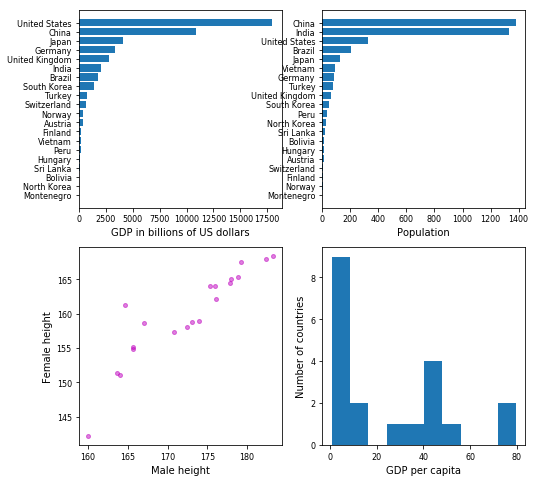

In [13]:
def visualizeCountries():
    SMALL_SIZE = 8
    MEDIUM_SIZE = 10
    BIGGER_SIZE = 12

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)

    data = np.load("countries.npy")
    names =  np.array(["Austria", "Bolivia", "Brazil", "China",
            "Finland", "Germany", "Hungary", "India",
            "Japan", "North Korea", "Montenegro", "Norway",
            "Peru", "South Korea", "Sri Lanka", "Switzerland",
            "Turkey", "United Kingdom", "United States", "Vietnam"])
    #20 countries
    population = data[:, 0]
    GDP = data[:, 1]
    male_height = data[:, 2]
    female_height = data[:, 3]

    plt.figure(figsize = [8,8])

    #sort by GDP from largest to smallest
    GDP_index = np.argsort(GDP)


    plt.subplot(2,2,1)

    positions = np.arange(20)
    plt.barh(positions, GDP[GDP_index], align="center")
    #print(names[GDP_index])
    #plt.barh(GDP[GDP_index], height = 1, width = 0.8)
    plt.yticks(positions, names[GDP_index])
    plt.xlabel("GDP in billions of US dollars")
    #plt.title("List of countries by GDP")

    plt.subplot(2,2,2)
    population_index = np.argsort(population)
    plt.barh(positions, population[population_index], align = "center")
    plt.yticks(positions, names[population_index])
    plt.xlabel("Population")
    #plt.title("List of countries by population")


    plt.subplot(2,2,3)
    plt.plot(male_height, female_height, "mo", markersize = 4, alpha = 0.5)
    plt.xlabel("Male height")
    plt.ylabel("Female height")
    #plt.title("Male height and female height across countries")

    plt.subplot(2,2,4)
    GDP_percapita = np.empty_like(GDP)
    GDP_percapita = GDP / population
    plt.hist(GDP_percapita)
    plt.xlabel("GDP per capita")
    plt.ylabel("Number of countries")

    print("Conclusions: \n1, it can be seen US and China dominate in GDP and China and India dominate in population.")
    print("2, it can be seen that male height an female height are heighly correlated")
    print("3, it can be seen that most countries still have low gpd GDP per capita.")

    plt.show()

visualizeCountries()

Part 3 pandas 1

Problem 1

In [14]:
def pd_problem_1():
    i = np.arange(0,52,2)
    v = i**2 - 1
    s = pd.Series(v, index = i)

    new_index = (i % 3 == 0)
    s[new_index] = 0
    print(s)

pd_problem_1()

0        0
2        3
4       15
6        0
8       63
10      99
12       0
14     195
16     255
18       0
20     399
22     483
24       0
26     675
28     783
30       0
32    1023
34    1155
36       0
38    1443
40    1599
42       0
44    1935
46    2115
48       0
50    2499
dtype: int64


Problem 2

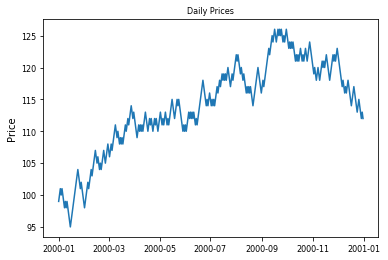

In [15]:
def pd_problem_2(p, d=100):
    dates = pd.date_range("1/1/2000", "12/31/2000", freq = "D")

    daily_shift = np.random.binomial(1, 0.5, len(dates))
    daily_shift[daily_shift==0] = -1
    daily_change = pd.Series(daily_shift, index = dates)
    daily_price = d + daily_change.cumsum()
    daily_price[daily_price < 0] = 0
    #print(daily_price)
    plt.plot(daily_price)
    plt.title("Daily Prices")
    plt.ylabel("Price")
    plt.show()
pd_problem_2(0.5)

Problem 3

In [16]:
def pd_problem_3():
    name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 'Matt', 'Alexander', 'JeanMarie']
    sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
    age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
    rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
    ID = range(9)
    aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
    GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
    mathID = [0, 1, 5, 6, 3]
    mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
    major = ['y', 'n', 'y', 'n', 'n']
    studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex, 'Age': age, 'Class': rank})
    otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
    mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 'Math_Major': major})
    #print(otherInfo.head())

    a1 = studentInfo["Age"]>19

    temp1 = studentInfo[a1]
    temp2 = temp1[temp1["Sex"]=="M"]
    print(temp2[["ID", "Name"]])
    
pd_problem_3()

   ID   Name
0   0  Mylan
6   6   Matt


Problem 4

In [17]:
def pd_problem_4():
    name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 'Matt', 'Alexander', 'JeanMarie']
    sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
    age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
    rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
    ID = range(9)
    aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
    GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
    mathID = [0, 1, 5, 6, 3]
    mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
    major = ['y', 'n', 'y', 'n', 'n']
    studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex, 'Age': age, 'Class': rank})
    otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
    mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 'Math_Major': major})


    #male_index_in_student = studentInfo["Sex"] == "M"
    #ID_needed = studentInfo[studentInfo["Sex"] == "M"]["ID"]
    #ID_index_in_other = otherInfo["ID"].isin(studentInfo[studentInfo["Sex"] == "M"]["ID"])

    result = pd.DataFrame({"ID": studentInfo[studentInfo["Sex"] == "M"]["ID"],
                           "Age": studentInfo[studentInfo["Sex"] == "M"]["Age"],
                           "GPA": otherInfo[otherInfo["ID"].isin(studentInfo[studentInfo["Sex"] == "M"]["ID"])]["GPA"]})

    print(result)
    
pd_problem_4()

   Age  GPA  ID
0   20  3.8   0
2   18  3.0   2
4   19  2.8   4
6   20  3.8   6
7   19  3.4   7


Problem 5

Below are 5 years with the highest crime rate:
      Population     Total  Violent  Property  Murder  Forcible-Rape  Robbery  \
Year                                                                            
1980   225349264  13408300  1344520  12063700   23040          82990   565840   
1991   252177000  14872900  1911770  12961100   24700         106590   687730   
1981   229146000  13423800  1361820  12061900   22520          82500   592910   
1990   248709873  14475600  1820130  12655500   23440         102560   639270   
1989   248239000  14251400  1646040  12605400   21500          94500   578330   

      Aggravated-assault  Burglary  Larcency-Theft  Vehicle-Theft  Crime_rate  
Year                                                                           
1980              672650   3795200         7136900        1131700    0.059500  
1991             1092740   3157200         8142200        1661700    0.058978  
1981              663900   3779700         7194400        1087800

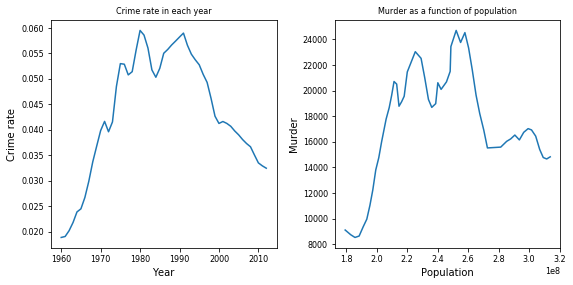

In [18]:
def pd_problem_5():
    data = pd.read_csv("crime_data.csv", skiprows = 1, index_col = "Year")
    data["Crime_rate"] = data["Total"]/data["Population"]
    #print(data.head())
    plt.figure(figsize=[8,4])
    plt.subplot(1,2,1)
    plt.plot(data.index, data["Crime_rate"])
    plt.xlabel("Year")
    plt.ylabel("Crime rate")
    plt.title("Crime rate in each year")
    print("Below are 5 years with the highest crime rate:")
    print(data.sort_values("Crime_rate", ascending = False).iloc[0:5, :])

    subdata = data.loc[1960:2012,]
    avg_total = subdata["Total"].mean()
    avg_Burglary = subdata["Burglary"].mean()
    print("The average number of toal crimes between 1960 and 2012 is", avg_total)
    print("The average number of toal burglaries between 1960 and 2012 is", avg_Burglary)
    print()
    print("Below are years s.t. the total number of crimes was below average, but the number of burglaries was above average:")
    print(subdata[subdata["Total"]<avg_total][subdata[subdata["Total"]<avg_total]["Burglary"]>avg_Burglary].index)

    plt.subplot(1,2,2)
    plt.plot(data["Population"], data["Murder"])
    plt.xlabel("Population")
    plt.ylabel("Murder")
    plt.title("Murder as a function of population")

    print()

    data_subset = data.loc[1980:1989][["Population", "Violent", "Robbery"]]
    data_subset.to_csv("crime_subset.csv")

    plt.tight_layout()
    plt.show()

pd_problem_5()

Part 4 Pandas 2

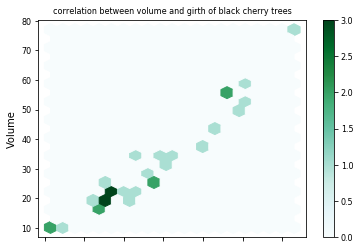

In [19]:
trees = data("trees")
trees.plot(x = "Girth", y = "Volume", kind = "hexbin", gridsize = 20)
plt.title("correlation between volume and girth of black cherry trees")
plt.show()

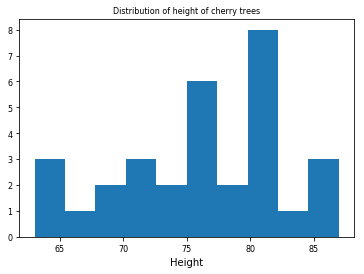

In [20]:
trees["Height"].hist(grid = False)
plt.xlabel("Height")
plt.title("Distribution of height of cherry trees")
plt.show()

/Users/Zeshun/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


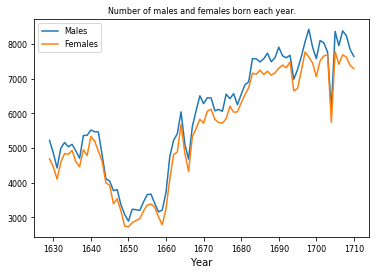

In [21]:
Arbuthnot = data("Arbuthnot")
#print(list(Arbuthnot))
#birthwt.plot(kind = "scatter")
Arbuthnot.plot(x = "Year", y = ['Males', 'Females'], kind = "line")
plt.title("Number of males and females born each year.")
#Arbuthnot.plot(kind = "line", x = "Year", y = "Females")
plt.show()

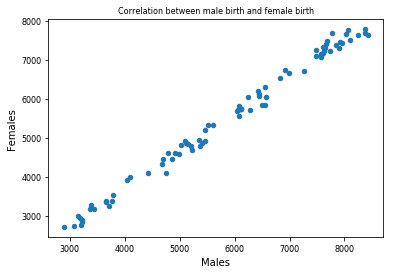

In [22]:
Arbuthnot.plot(kind = "scatter", x = "Males", y = "Females")
plt.title("Correlation between male birth and female birth")
plt.show()

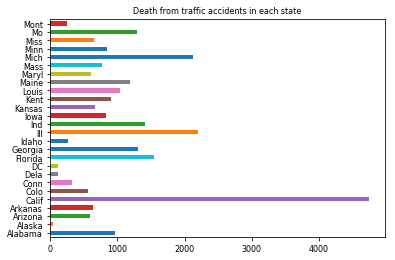

In [23]:
road = data("road")
#print(data("road", show_doc = True))
road.plot(kind = "barh", y = "deaths", legend = False)
plt.title("Death from traffic accidents in each state")
plt.show()

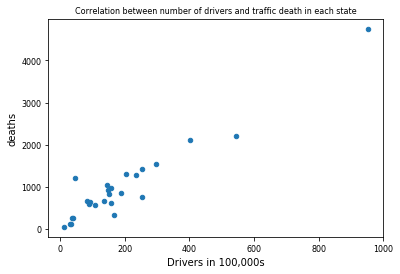

In [24]:
road.plot(kind = "scatter", x = "drivers", y = "deaths")
plt.xlabel("Drivers in 100,000s")
plt.title("Correlation between number of drivers and traffic death in each state")
plt.show()

     birth  death
alg   36.4   14.6
con   37.3    8.0
egy   42.1   15.3
gha   55.8   25.6
ict   56.1   33.1


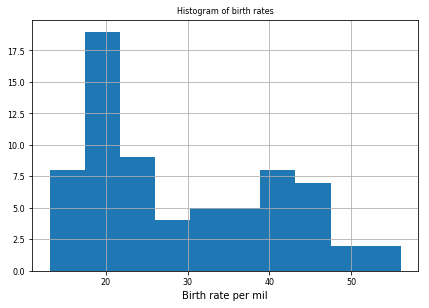

In [25]:
bir = data("birthdeathrates")
print(bir.head())

bir["birth"].hist()
plt.tight_layout()
plt.xlabel("Birth rate per mil")
plt.title("Histogram of birth rates")
plt.show()


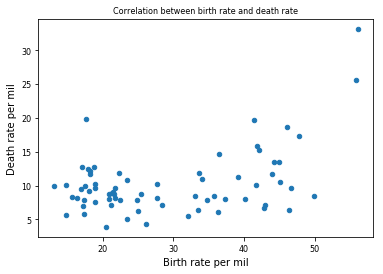

In [26]:
bir.plot(kind = "scatter" , x = "birth", y = "death")
plt.xlabel("Birth rate per mil")
plt.ylabel("Death rate per mil")
plt.title("Correlation between birth rate and death rate")
plt.show()

In [27]:
lung = data("lung")
print(lung.head())
print("Source: Terry Therneau")

   inst  time  status  age  sex  ph.ecog  ph.karno  pat.karno  meal.cal  \
1   3.0   306       2   74    1      1.0      90.0      100.0    1175.0   
2   3.0   455       2   68    1      0.0      90.0       90.0    1225.0   
3   3.0  1010       1   56    1      0.0      90.0       90.0       NaN   
4   5.0   210       2   57    1      1.0      90.0       60.0    1150.0   
5   1.0   883       2   60    1      0.0     100.0       90.0       NaN   

   wt.loss  
1      NaN  
2     15.0  
3     15.0  
4     11.0  
5      0.0  
Source: Terry Therneau


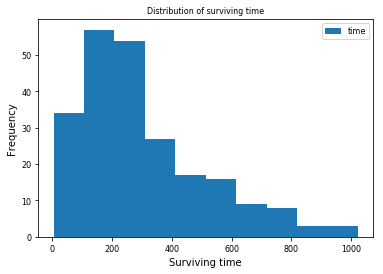

In [28]:
lung.plot(kind = "hist", y = "time")
plt.title("Distribution of surviving time")
plt.xlabel("Surviving time")
plt.show()

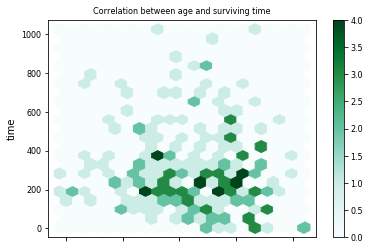

In [29]:
lung.plot(kind = "hexbin", x="age", y = "time", gridsize = 20)
plt.title("Correlation between age and surviving time")
plt.show()

Part 4 Pandas 3

Problem 1

In [30]:
iris = data("iris")
print(iris.head())

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
1           5.1          3.5           1.4          0.2  setosa
2           4.9          3.0           1.4          0.2  setosa
3           4.7          3.2           1.3          0.2  setosa
4           4.6          3.1           1.5          0.2  setosa
5           5.0          3.6           1.4          0.2  setosa


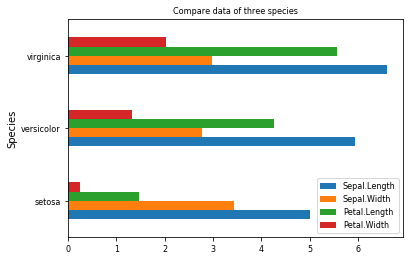

In [31]:
iris_species = iris.groupby("Species")
iris_species[["Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width"]].mean().plot(kind = "barh")
plt.title("Compare data of three species")
plt.show()

In [32]:
print("Obseve that Setosa has significantly smaller petal width and petal length. Hence it it the easiest to distinguish.")

Obseve that Setosa has significantly smaller petal width and petal length. Hence it it the easiest to distinguish.


In [33]:
print("If the flower has significantly smaller petal width and petal length, it tends to be setosa.")
print("If the flower has larger sepal lenth and larger petal lenth, it tends to be virginica.")
print("The other case is versicolor.")

If the flower has significantly smaller petal width and petal length, it tends to be setosa.
If the flower has larger sepal lenth and larger petal lenth, it tends to be virginica.
The other case is versicolor.


In [34]:
poi = data("poisons")
print(poi.head())

   time  poison treat
1  0.31       1     A
2  0.45       1     A
3  0.46       1     A
4  0.43       1     A
5  0.36       2     A


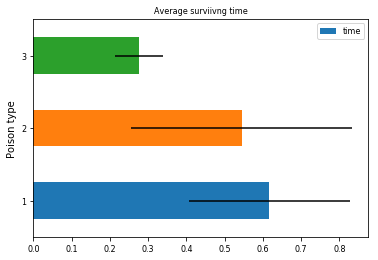

In [58]:
poi_by_poi = poi.groupby("poison")
poi_by_poi["time"].mean().plot(kind= "barh", xerr = poi_by_poi.std(), legend = True)
plt.ylabel("Poison type")
plt.title("Average surviivng time")
plt.show()

In [37]:
print("It can be seen that poison type 3 is the most effective.")

It can be seen that poison type 3 is the most effective.


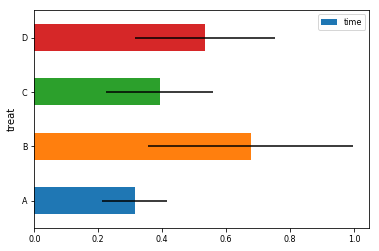

In [40]:
poi_by_tre = poi.groupby("treat")
poi_by_tre["time"].mean().plot(kind= "barh", xerr = poi_by_tre.std(), legend = True)
plt.show()

In [56]:
print("It can be seen that treatment B is the most effective.")

It can be seen that treatment B is the most effective.


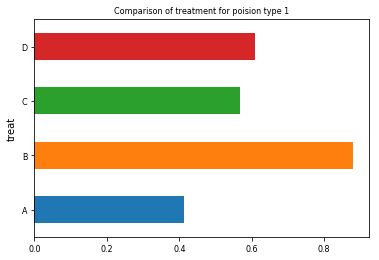

In [51]:
poi_1 = poi.groupby("poison").get_group(1)
poi_2 = poi.groupby("poison").get_group(2)
poi_3 = poi.groupby("poison").get_group(3)
poi_1_tr = poi_1.groupby("treat")
poi_2_tr = poi_2.groupby("treat")
poi_3_tr = poi_3.groupby("treat")

poi_1_tr["time"].mean().plot(kind = "barh", title = "Comparison of treatment for poision type 1")
plt.show()

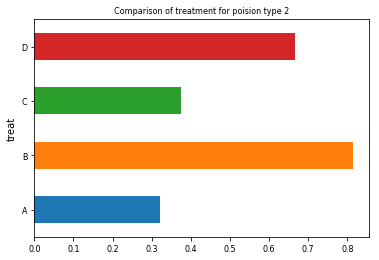

In [52]:
poi_2_tr["time"].mean().plot(kind = "barh", title = "Comparison of treatment for poision type 2")
plt.show()

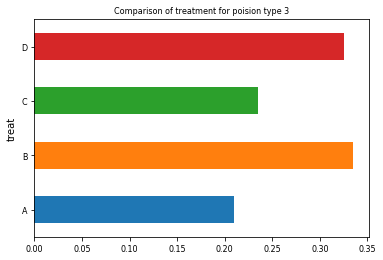

In [53]:
poi_3_tr["time"].mean().plot(kind = "barh", title = "Comparison of treatment for poision type 3")
plt.show()

In [57]:
print("If one does not know the type of poison, treatment B would be a good choice.")
print("If it is poison type 1, one should choose treatment B.")
print("If it is poison type 1, one should choose treatment B.")
print("If it is poison type 1, one should choose treatment B.")


If one does not know the type of poison, treatment B would be a good choice.
If it is poison type 1, one should choose treatment B.
If it is poison type 1, one should choose treatment B.
If it is poison type 1, one should choose treatment B.


In [60]:
diam  = data("diamonds")
print(diam.head())

   carat      cut color clarity  depth  table  price     x     y     z
1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


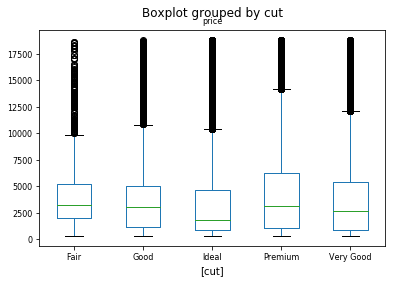

In [70]:
diam.boxplot(["price"], by=["cut"], grid = False)
plt.show()

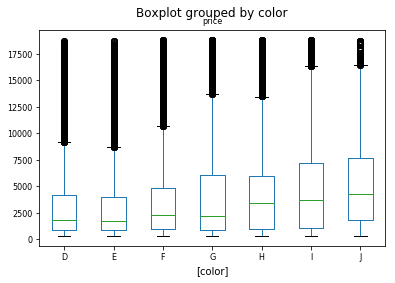

In [69]:
diam.boxplot(["price"], by=["color"], grid = False)
plt.show()

In [71]:
print("Result is hard to conclude since both have many outliers.")
print("It can still be seen that better color and better cut yield heigher prices.")

Result is hard to conclude since both have many outliers.
It can still be seen that better color and better cut yield heigher prices.


In [80]:
diam_c = diam.groupby("color").get_group("H")
diam_c_f = diam_c.groupby("cut").get_group("Fair")
diam_c_s = diam_c.groupby("cut").get_group("Ideal")
print("Average size of color H diamonds with fair cut: ", diam_c_f["carat"].mean())
print("Average size of color H diamonds with ideal cut: ", diam_c_s["carat"].mean())
print("The reason that the first categoty generally sells higher prices is that such diamonds are by nature larger.")

Average size of color H diamonds with fair cut:  1.2191749174917463
Average size of color H diamonds with ideal cut:  0.7995248796147678
The reason that the first categoty generally sells higher prices is that such diamonds are by nature larger.


Problem 2 DATASET NOT FOUND

Problem 3

In [9]:
pd.cut([9,1,2,3,4,5,6,7], [0,3,8])

[NaN, (0, 3], (0, 3], (0, 3], (3, 8], (3, 8], (3, 8], (3, 8]]
Categories (2, interval[int64]): [(0, 3] < (3, 8]]

In [12]:
npk = data("npk")

In [13]:
print(npk.head())

   block  N  P  K  yield
1      1  0  1  1   49.5
2      1  1  1  0   62.8
3      1  0  0  0   46.8
4      1  1  0  1   57.0
5      2  1  0  0   59.8


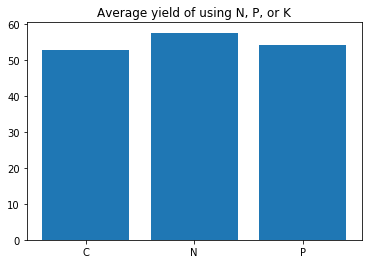

In general, nitrogen is the most effective one.


yield
N P K           
0 0 0  51.433333
    1  52.000000
  1 0  54.333333
    1  50.500000
1 0 0  63.766667
    1  54.666667
  1 0  57.933333
    1  54.366667

In [44]:


npk_n = npk[npk["N"]==1]
npk_p = npk[npk["P"]==1]
npk_k = npk[npk["K"]==1]
plt.bar(x=["N","P","C"], height = [npk_n["yield"].mean(), npk_p["yield"].mean(), npk_k["yield"].mean()])
plt.title("Average yield of using N, P, or K")
plt.show()
print("In general, nitrogen is the most effective one.")


In [45]:
npk_prime = npk.pivot_table(values = "yield", index = ["N", "P", "K"])
npk_prime

yield
N P K           
0 0 0  51.433333
    1  52.000000
  1 0  54.333333
    1  50.500000
1 0 0  63.766667
    1  54.666667
  1 0  57.933333
    1  54.366667

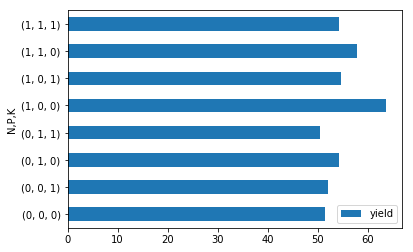

Using only nitrogen is the best. Using both P and K is the worst.


In [49]:
npk_prime.plot(kind = "barh")
plt.show()
print("Using only nitrogen is the best. Using both P and K is the worst.")

In [52]:
swiss = data("swiss")
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


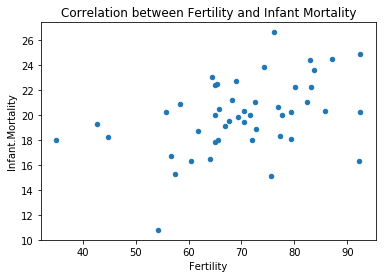

In general, fertility and infant mortality are positively correlated.


In [54]:
swiss.plot(kind = "scatter", x = "Fertility", y="Infant.Mortality")
plt.title("Correlation between Fertility and Infant Mortality")
plt.show()
print("In general, fertility and infant mortality are positively correlated.")

In [60]:
cath = pd.cut(swiss["Catholic"], np.arange(0, 110, 10))
swiss.pivot_table(values = [ "Fertility"], index = cath)
print("Provinces that are highly catholic tend to have higher fertility")

Provinces that are highly catholic tend to have higher fertility


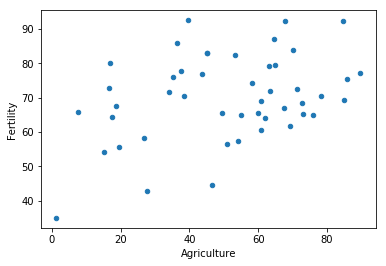

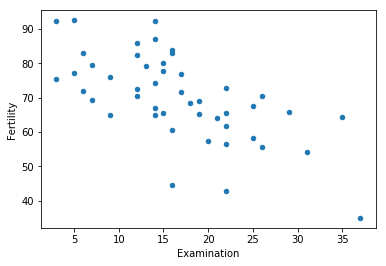

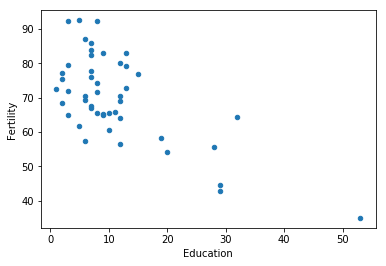

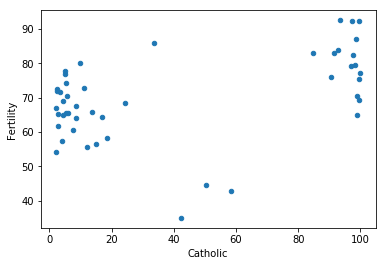

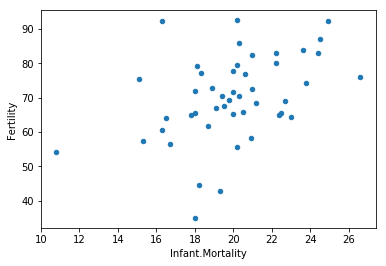

In [70]:
swiss.plot( y = "Fertility", x = "Agriculture", kind = "scatter")
swiss.plot( y = "Fertility", x = "Examination", kind = "scatter")
swiss.plot( y = "Fertility", x = "Education", kind = "scatter")
swiss.plot( y = "Fertility", x = "Catholic", kind = "scatter")
swiss.plot( y = "Fertility", x = "Infant.Mortality", kind = "scatter")

In [71]:
print("Infact mortality and agriculture are the most important factors for predicting fertility.")

Infact mortality and agriculture are the most important factors for predicting fertility.


Part 5 Pandas 4
Problem 1

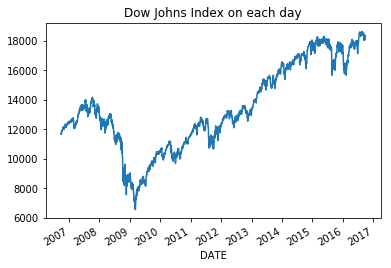

In [12]:
djia = pd.read_csv("DJIA.csv")
date_index = pd.to_datetime(djia["DATE"])

djia["VALUE"][djia["VALUE"]=="."]="NaN"

new_djia = pd.Series([float(x) for x in djia["VALUE"]], index = date_index)
new_djia = new_djia.dropna()
new_djia.plot()
plt.title("Dow Johns Index on each day")
plt.show()


Problem 2

In [33]:
paychecks = pd.read_csv("paychecks.csv", header = None, skiprows = 0, names = ["Wage"])
print(len(paychecks))

93


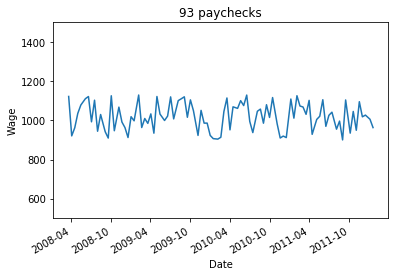

In [39]:
date_range_1 = pd.date_range(start = "3/13/2008", end = "6/1/2018", freq = "WOM-1FRI")
date_range_2 = pd.date_range(start = "3/13/2008", end = "6/1/2018", freq = "WOM-3FRI")
date_range = date_range_1.union(date_range_2)
date_range = date_range[0:len(paychecks)]

pays = pd.Series(data = [float(x) for x in paychecks["Wage"]], index = date_range)
pays.plot()
plt.title("93 paychecks")
plt.ylim(500, 1500)
plt.xlabel("Date")
plt.ylabel("Wage")
plt.show()

Problem 3

In [40]:
finance = pd.read_csv("finances.csv")
per=pd.period_range("1978-09","1999-08",freq="Q-AUG")
finance.index=per
finance.head()

,EARNINGS,EXPENSES
1979Q1,372572.16,122611.27
1979Q2,419440.58,133176.18
1979Q3,419766.49,154670.69
1979Q4,361453.31,209360.42
1980Q1,354463.33,174147.13


Problem 4

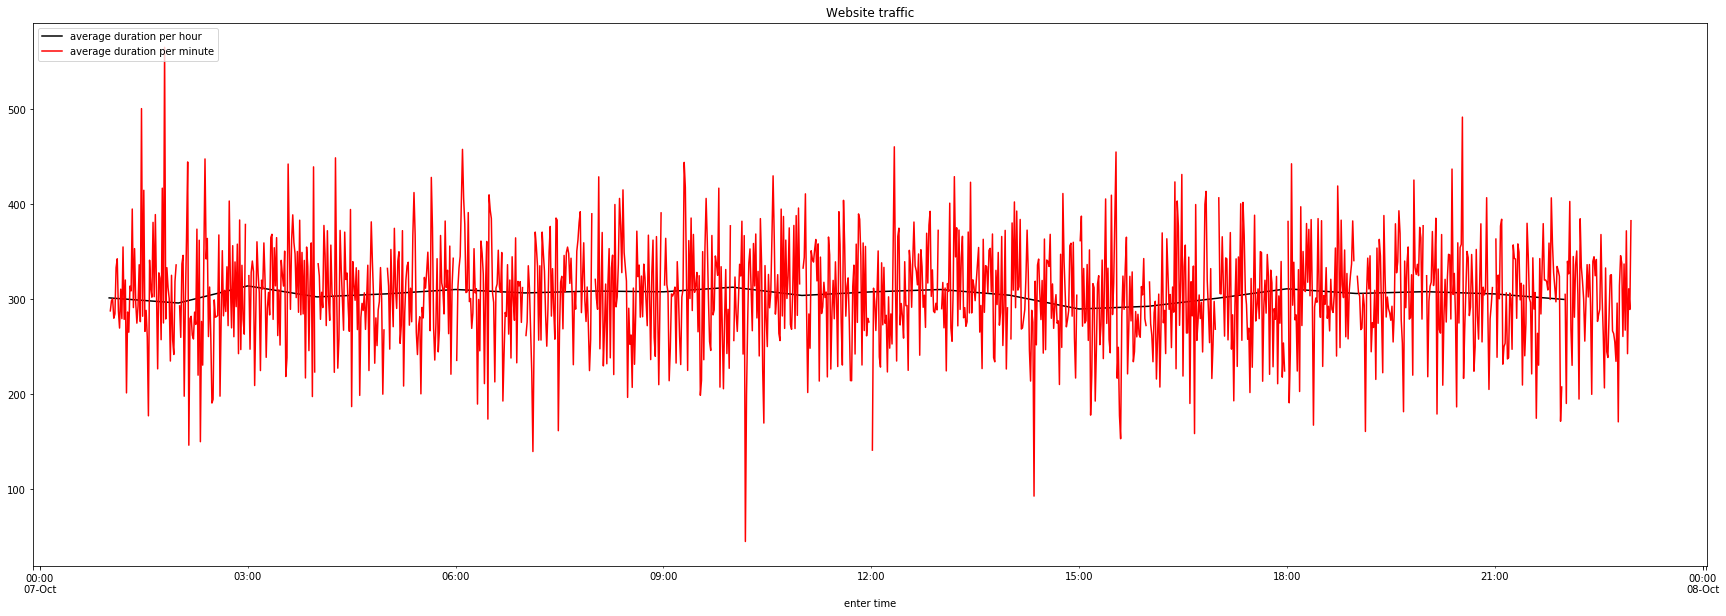

In [46]:
website = pd.read_csv("website_traffic.csv")
enter = pd.to_datetime(website["ENTER"])
leave = pd.to_datetime(website["LEAVE"])

website["DURATION"] = leave-enter
website["DURATION"] = website["DURATION"].dt.total_seconds().astype(int)

enter_index = pd.to_datetime(website["ENTER"])
website.index = enter_index
website.drop("ENTER",axis=1)
website.index.names=['enter time']
minutes = website.resample("T")
m = minutes["DURATION"].mean()
hours=website.resample("H")
h=hours["DURATION"].mean()
plt.figure(figsize=(30,10))
ax1=h.plot(color='black',label='average duration per hour')
ax2=m.plot(color='red',label='average duration per minute')

ax1.legend(loc=1)
ax2.legend(loc=2)
plt.title("Website traffic")
plt.show()

Problem 5

In [51]:

diff_in_day = new_djia - new_djia.shift(1)
print("The single day with the largest gain: ",diff_in_day.idxmax(), "value: ", diff_in_day.max())
print("The single day with the largest loss: ",diff_in_day.idxmin(), "value: ", diff_in_day.min())
months = new_djia.resample('M')
diff_in_month = months.last() - months.first()
print("The month with the largest gain: ",diff_in_month.idxmax(), "value: ", diff_in_month.max())
print("The month with the largest loss: ",diff_in_month.idxmin(), "value: ", diff_in_month.min())

The single day with the largest gain:  2008-10-13 00:00:00 value:  936.4200000000001
The single day with the largest loss:  2008-09-29 00:00:00 value:  -777.6799999999985
The month with the largest gain:  2015-10-31 00:00:00 value:  1391.5300000000007
The month with the largest loss:  2008-10-31 00:00:00 value:  -1506.0599999999995


Problem 6

Text(0.5,1,'Window = 30')

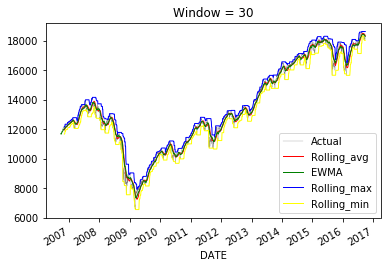

In [59]:
ax1=plt.subplot(1,1,1)
new_djia.plot(color="gray", lw=.3,ax=ax1)
new_djia.rolling(window=30).mean().plot(color='r', lw=1,ax=ax1)
new_djia.ewm(span=30).mean().plot(color='g', lw=1,ax=ax1)
new_djia.rolling(window=30).max().plot(color="blue",lw=1,ax=ax1)
new_djia.rolling(window=30).min().plot(color="yellow",lw=1,ax=ax1)
ax1.legend(["Actual", "Rolling_avg","EWMA","Rolling_max","Rolling_min"], loc="lower right")
ax1.set_title("Window = 30")

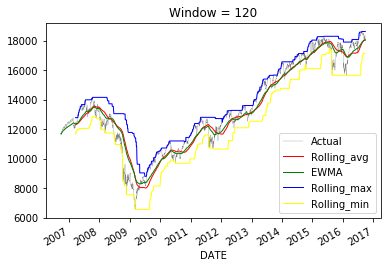

In [64]:
ax2=plt.subplot(1,1,1)
new_djia.plot(color="gray", lw=.3,ax=ax2)
new_djia.rolling(window=120).mean().plot(color='r', lw=1,ax=ax2)
new_djia.ewm(span=120).mean().plot(color='g', lw=1,ax=ax2)
new_djia.rolling(window=120).max().plot(color="blue",lw=1,ax=ax2)
new_djia.rolling(window=120).min().plot(color="yellow",lw=1,ax=ax2)
ax2.legend(["Actual", "Rolling_avg","EWMA","Rolling_max","Rolling_min"], loc="lower right")
ax2.set_title("Window = 120")
plt.show()

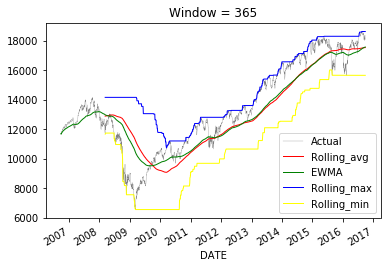

In [66]:
ax3=plt.subplot(1,1,1)
new_djia.plot(color="gray", lw=.3,ax=ax3)
new_djia.rolling(window=365).mean().plot(color='r', lw=1,ax=ax3)
new_djia.ewm(span=365).mean().plot(color='g', lw=1,ax=ax3)
new_djia.rolling(window=365).max().plot(color="blue",lw=1,ax=ax3)
new_djia.rolling(window=365).min().plot(color="yellow",lw=1,ax=ax3)
ax3.legend(["Actual", "Rolling_avg","EWMA","Rolling_max","Rolling_min"], loc="lower right")
ax3.set_title("Window = 365")
plt.show()